In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
#visualisasi data
import seaborn as sns
#visualisasi data
import matplotlib.pyplot as plt
#untuk memisahkan data train dan test
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from sklearn import tree
from sklearn import metrics
#LIBRARI NAIVE BAYES
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,classification_report
from sklearn.naive_bayes import GaussianNB


**PREPROCESSING DATA**

In [ ]:
#import dataset
dataset = pd.read_csv('heart.csv')

#menampilkan jumlah baris dan kolom
print(dataset.shape)
print(dataset.columns)

(303, 14)
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [ ]:
#menampilkan data yang kosong/null
null_counts = dataset.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [ ]:
dataset.describe()  # menampilkan deskripsi statistik dari datasetnya

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.head() #menampilkan 5 baris data teratas

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#menghapus baris data yang bernilai null, lalu menampilkan jumlah baris dan kolom dataset
dataset = dataset.dropna(axis=0)
print(dataset.shape)
print(dataset.columns)

(303, 14)
Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [ ]:
dataset["output"].value_counts() #menghitung jumlah '1' dan '0' pada atribut 'output'

1    165
0    138
Name: output, dtype: int64

In [ ]:
#melakukan normalisasi pada tiap kolom pada dataset
#hasil dataset yang sudah dinormalisasi dimasukkan pada variabel df_norm
df_norm = dataset.copy()
for column in df_norm.columns:
    df_norm[column] = (df_norm[column]-df_norm[column].min())/(df_norm[column].max()-df_norm[column].min())
df_norm.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [ ]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df_norm.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


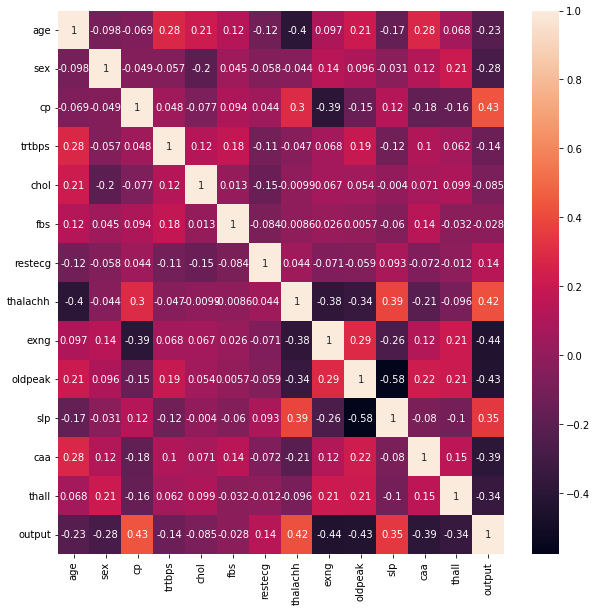

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True) #VISUALISASI dataset sebelum normalisasi DGN HEATMAP untuk melihat korelasi (keterkaitan) antara parameter

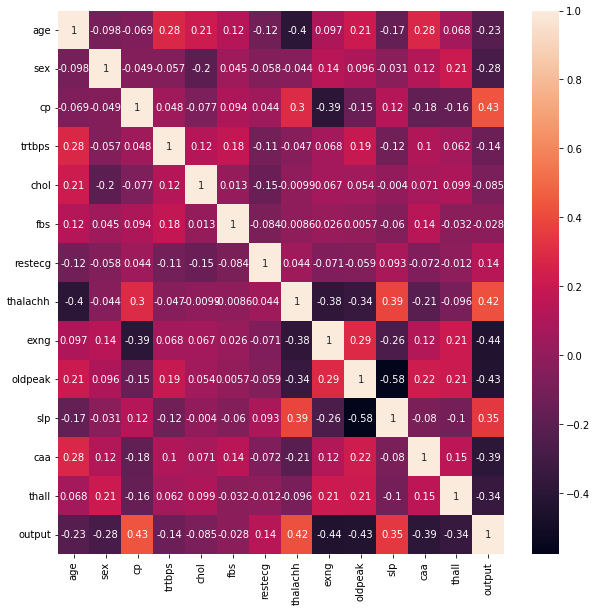

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_norm.corr(),annot=True) #VISUALISASI dataset setelah normalisasi DGN HEATMAP untuk melihat korelasi (keterkaitan) antara parameter

In [ ]:
#menampilkan nilai korelasi tiap atribut dengan atribut 'output' pada dataset yang belum dinormalisasi
corr = dataset.corr()
corr['output']

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

In [ ]:
#menampilkan nilai korelasi tiap atribut dengan atribut 'output' pada dataset yang sudah dinormalisasi
corr_norm = df_norm.corr()
corr_norm['output']

age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

In [ ]:
# memilih atribut dengan korelasi lebih dari 0.4 dan kurang dari -0.4 pada dataset yang sudah dinormalisasi
# 5 atribut yang sudah dipilih dimasukkan pada variabel goodCols
# dataset dengan 5 atribut pada goodCols dimasukkan pada variabel dataSelected
goodCols=['cp','thalachh','exng','oldpeak','output'] 
dataSelected=df_norm[goodCols]
dataSelected.head()

,cp,thalachh,exng,oldpeak,output
0,1.000000,0.603053,0.0,0.370968,1.0
1,0.666667,0.885496,0.0,0.564516,1.0
2,0.333333,0.770992,0.0,0.225806,1.0
3,0.333333,0.816794,0.0,0.129032,1.0
4,0.000000,0.702290,1.0,0.096774,1.0


In [ ]:
# memilih atribut dengan korelasi lebih dari 0.3 dan kurang dari -0.3 pada dataset yang sudah dinormalisasi
# 8 atribut yang sudah dipilih dimasukkan pada variabel goodCols2
# dataset dengan 8 atribut pada goodCols2 dimasukkan pada variabel dataSelected2
goodCols2=['cp','thalachh','exng','oldpeak','slp','caa','thall','output'] 
dataSelected2=df_norm[goodCols2]
dataSelected2.head()

,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,1.000000,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.666667,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.333333,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.333333,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.000000,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


**DATA SPLITTING**

In [ ]:
#menjadikan data sebagai matriks
#memisahkan variabel independent dan dependent pada dataset dengan atribut yang masih lengkap (df_norm)
#semua kolom kecuali kolom terakhir merupakan nilai X
X = df_norm.iloc[:,:-1].values
#semua dari kolom terakhir adalah Y
Y = df_norm.iloc[:,-1].values
print(Y)
print(X)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.70833333 1.         1.         ... 0.         0.         0.33333333]
 [0.

In [ ]:
#menjadikan data sebagai matriks
#memisahkan variabel independent dan dependent pada dataset dengan 5 atribut (dataSelected)
#semua kolom kecuali kolom terakhir merupakan nilai X2
X2 = dataSelected.iloc[:,:-1].values
#semua dari kolom terakhir adalah Y
Y2 = dataSelected.iloc[:,-1].values
print(Y2)
print(X2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[1.         0.60305344 0.         0.37096774]
 [0.66666667 0.88549618 0.    

In [ ]:
#menjadikan data sebagai matriks
#memisahkan variabel independent dan dependent pada dataset dengan 8 atribut (dataSelected2)
#semua kolom kecuali kolom terakhir merupakan nilai X3
X3 = dataSelected2.iloc[:,:-1].values
#semua dari kolom terakhir adalah Y
Y3 = dataSelected2.iloc[:,-1].values
print(Y3)
print(X3)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[1.         0.60305344 0.         ... 0.         0.         0.33333333]
 [0.

In [ ]:
#membagi data menjadi data train dan test
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state=2) #dataset atribut lengkap
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(X2, Y2, test_size = 0.2, random_state=2) #dataset 5 atribut
xTrain3, xTest3, yTrain3, yTest3 = train_test_split(X3, Y3, test_size = 0.2, random_state=2) #dataset 8 atribut

# 0.2 artinya data testnya ada 20% dari total 303 rekam data
#random state = 2 artinya diambil secara acak ada 2

In [ ]:
#membuat fungsi recall, accuracy, dan precision dengan input berupa array confusion matrix

#menghitung recall dengan rumus (TP) / (TP + FN)
def recall(x)-> float:
    result=x[0,0]/(x[1,0]+x[0,0])
    print(result*100)
    return result

#menghitung akurasi dengan rumus (TP + TN ) / (TP+FP+FN+TN)
def accuracy(x)-> float:
    result=(x[0,0]+x[1,1])/(x[1,0]+x[0,0]+x[0,1]+x[1,1])
    print(result*100)
    return result

#menghitung presisi dengan rumus (TP) / (TP+FP)
def precision(x)-> float:
    result=x[0,0]/(x[0,0]+x[0,1])
    print(result*100)
    return result

**Naive Bayes**

In [ ]:
#melakukan klasifikasi Naive Bayes pada dataset dengan seluruh atribut 
classifier_nb = GaussianNB()
classifier_nb.fit(xTrain, yTrain)

y_pred_nb = classifier_nb.predict(xTest)

#hasil klasifikasi dijadikan sebuah confusion matrix yang dimasukkan pada variabel cm_nb
#memanggil fungsi recall dengan input cm_nb kemudian hasilnya dimasukkan pada recallnb1 (menghitung recall)
#memanggil fungsi precision dengan input cm_nb kemudian hasilnya dimasukkan pada precisionnb1 (menghitung presisi)
#memanggil fungsi accuracy dengan input cm_nb kemudian hasilnya dimasukkan pada accuracynb1 (menghitung akurasi)

cm_nb = confusion_matrix(yTest, y_pred_nb)
recallnb1 = recall(cm_nb)
precisionnb1 = precision(cm_nb)
accuracynb1 = accuracy_score(yTest, y_pred_nb)*100

recallnb1
precisionnb1
accuracynb1

90.32258064516128
87.5


88.52459016393442

In [ ]:
#melakukan klasifikasi Naive Bayes pada dataset dengan 5 atribut 
classifier_nb = GaussianNB()
classifier_nb.fit(xTrain2, yTrain2)

y_pred_nb2 = classifier_nb.predict(xTest2)

#hasil klasifikasi dijadikan sebuah confusion matrix yang dimasukkan pada variabel cm_nb2
#memanggil fungsi recall dengan input cm_nb2 kemudian hasilnya dimasukkan pada recallnb1 (menghitung recall)
#memanggil fungsi precision dengan input cm_nb2 kemudian hasilnya dimasukkan pada precisionnb1 (menghitung presisi)
#memanggil fungsi accuracy dengan input cm_nb2 kemudian hasilnya dimasukkan pada accuracynb1 (menghitung akurasi)

cm_nb2 = confusion_matrix(yTest2, y_pred_nb2)
recallnb2 = recall(cm_nb2)
precisionnb2 = precision(cm_nb2)
accuracynb2 = accuracy_score(yTest2, y_pred_nb2)*100

recallnb2
precisionnb2
accuracynb2

84.375
84.375


83.60655737704919

In [ ]:
#melakukan klasifikasi Naive Bayes pada dataset dengan 8 atribut 
classifier_nb = GaussianNB()
classifier_nb.fit(xTrain3, yTrain3)

y_pred_nb3 = classifier_nb.predict(xTest3)

#hasil klasifikasi dijadikan sebuah confusion matrix yang dimasukkan pada variabel cm_nb3
#memanggil fungsi recall dengan input cm_nb3 kemudian hasilnya dimasukkan pada recallnb1 (menghitung recall)
#memanggil fungsi precision dengan input cm_nb3 kemudian hasilnya dimasukkan pada precisionnb1 (menghitung presisi)
#memanggil fungsi accuracy dengan input cm_nb3 kemudian hasilnya dimasukkan pada accuracynb1 (menghitung akurasi)

cm_nb3 = confusion_matrix(yTest3, y_pred_nb3)
recallnb3 = recall(cm_nb3)
precisionnb3 = precision(cm_nb3)
accuracynb3 = accuracy_score(yTest3, y_pred_nb3)*100

recallnb3
precisionnb3
accuracynb3

93.33333333333333
87.5


90.1639344262295

**Decission Tree**

In [ ]:
#melakukan klasifikasi Decision Tree pada dataset dengan seluruh atribut 
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(xTrain, yTrain)

y_pred_dt = classifier_dt.predict(xTest)

#hasil klasifikasi dijadikan sebuah confusion matrix yang dimasukkan pada variabel cm_dt
#memanggil fungsi recall dengan input cm_dt kemudian hasilnya dimasukkan pada recalldt1 (menghitung recall)
#memanggil fungsi precision dengan input cm_dt kemudian hasilnya dimasukkan pada precisiondt1 (menghitung presisi)
#memanggil fungsi accuracy dengan input yTest, y_pred_dt kemudian hasilnya dimasukkan pada accuracydt1 (menghitung akurasi)
cm_dt = confusion_matrix(yTest, y_pred_dt)
recalldt1 = recall(cm_dt)
precisiondt1 = precision(cm_dt)
accuracydt1 = accuracy_score(yTest, y_pred_dt)*100

recalldt1
precisiondt1
accuracydt1

82.75862068965517
75.0


78.68852459016394

In [ ]:
#melakukan klasifikasi Decision Tree pada dataset dengan 5 atribut 
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(xTrain2, yTrain2)

y_pred_dt2 = classifier_dt.predict(xTest2)

#hasil klasifikasi dijadikan sebuah confusion matrix yang dimasukkan pada variabel cm_dt2
#memanggil fungsi recall dengan input cm_dt2 kemudian hasilnya dimasukkan pada recalldt2 (menghitung recall)
#memanggil fungsi precision dengan input cm_dt2 kemudian hasilnya dimasukkan pada precisiondt2 (menghitung presisi)
#memanggil fungsi accuracy dengan input cm_dt2 kemudian hasilnya dimasukkan pada accuracydt2 (menghitung akurasi)
cm_dt2 = confusion_matrix(yTest2, y_pred_dt2)
recalldt2 = recall(cm_dt2)
precisiondt2 = precision(cm_dt2)
accuracydt2 = accuracy_score(yTest2, y_pred_dt2)*100

recalldt2
precisiondt2
accuracydt2

69.6969696969697
71.875


68.85245901639344

In [ ]:
#melakukan klasifikasi Decision Tree pada dataset dengan 8 atribut 
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(xTrain3, yTrain3)

y_pred_dt3 = classifier_dt.predict(xTest3)

#hasil klasifikasi dijadikan sebuah confusion matrix yang dimasukkan pada variabel cm_dt3
#memanggil fungsi recall dengan input cm_dt3 kemudian hasilnya dimasukkan pada recalldt3 (menghitung recall)
#memanggil fungsi precision dengan input cm_dt3 kemudian hasilnya dimasukkan pada precisiondt3 (menghitung presisi)
#memanggil fungsi accuracy dengan input cm_dt3 kemudian hasilnya dimasukkan pada accuracydt3 (menghitung akurasi)
cm_dt3 = confusion_matrix(yTest3, y_pred_dt3)
recalldt3 = recall(cm_dt3)
precisiondt3 = precision(cm_dt3)
accuracydt3 = accuracy_score(yTest3, y_pred_dt3)*100

recalldt3
precisiondt3
accuracydt3

92.5925925925926
78.125


85.24590163934425

**MEMBUAT POHON KEPUTUSAN**

In [ ]:
#menampilkan akurasi tiap level pohon keputusan Decision Tree pada dataset dengan 8 atribut
from sklearn.tree import DecisionTreeClassifier
max_depth_range = list(range(1, 20))
# Memasukkan akurasi pada setiap level pohon ke dalam listaccuracy dari level 1 sampai 20:
listaccuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(xTrain3, yTrain3)
    score = clf.score(xTest3, yTest3)
    listaccuracy.append(score)
listaccuracy

[0.819672131147541,
 0.7377049180327869,
 0.8852459016393442,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426]

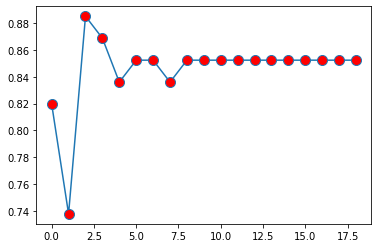

In [ ]:
from matplotlib import pyplot as plt
plt.plot(listaccuracy, marker='o', markerfacecolor='red', markersize=10)

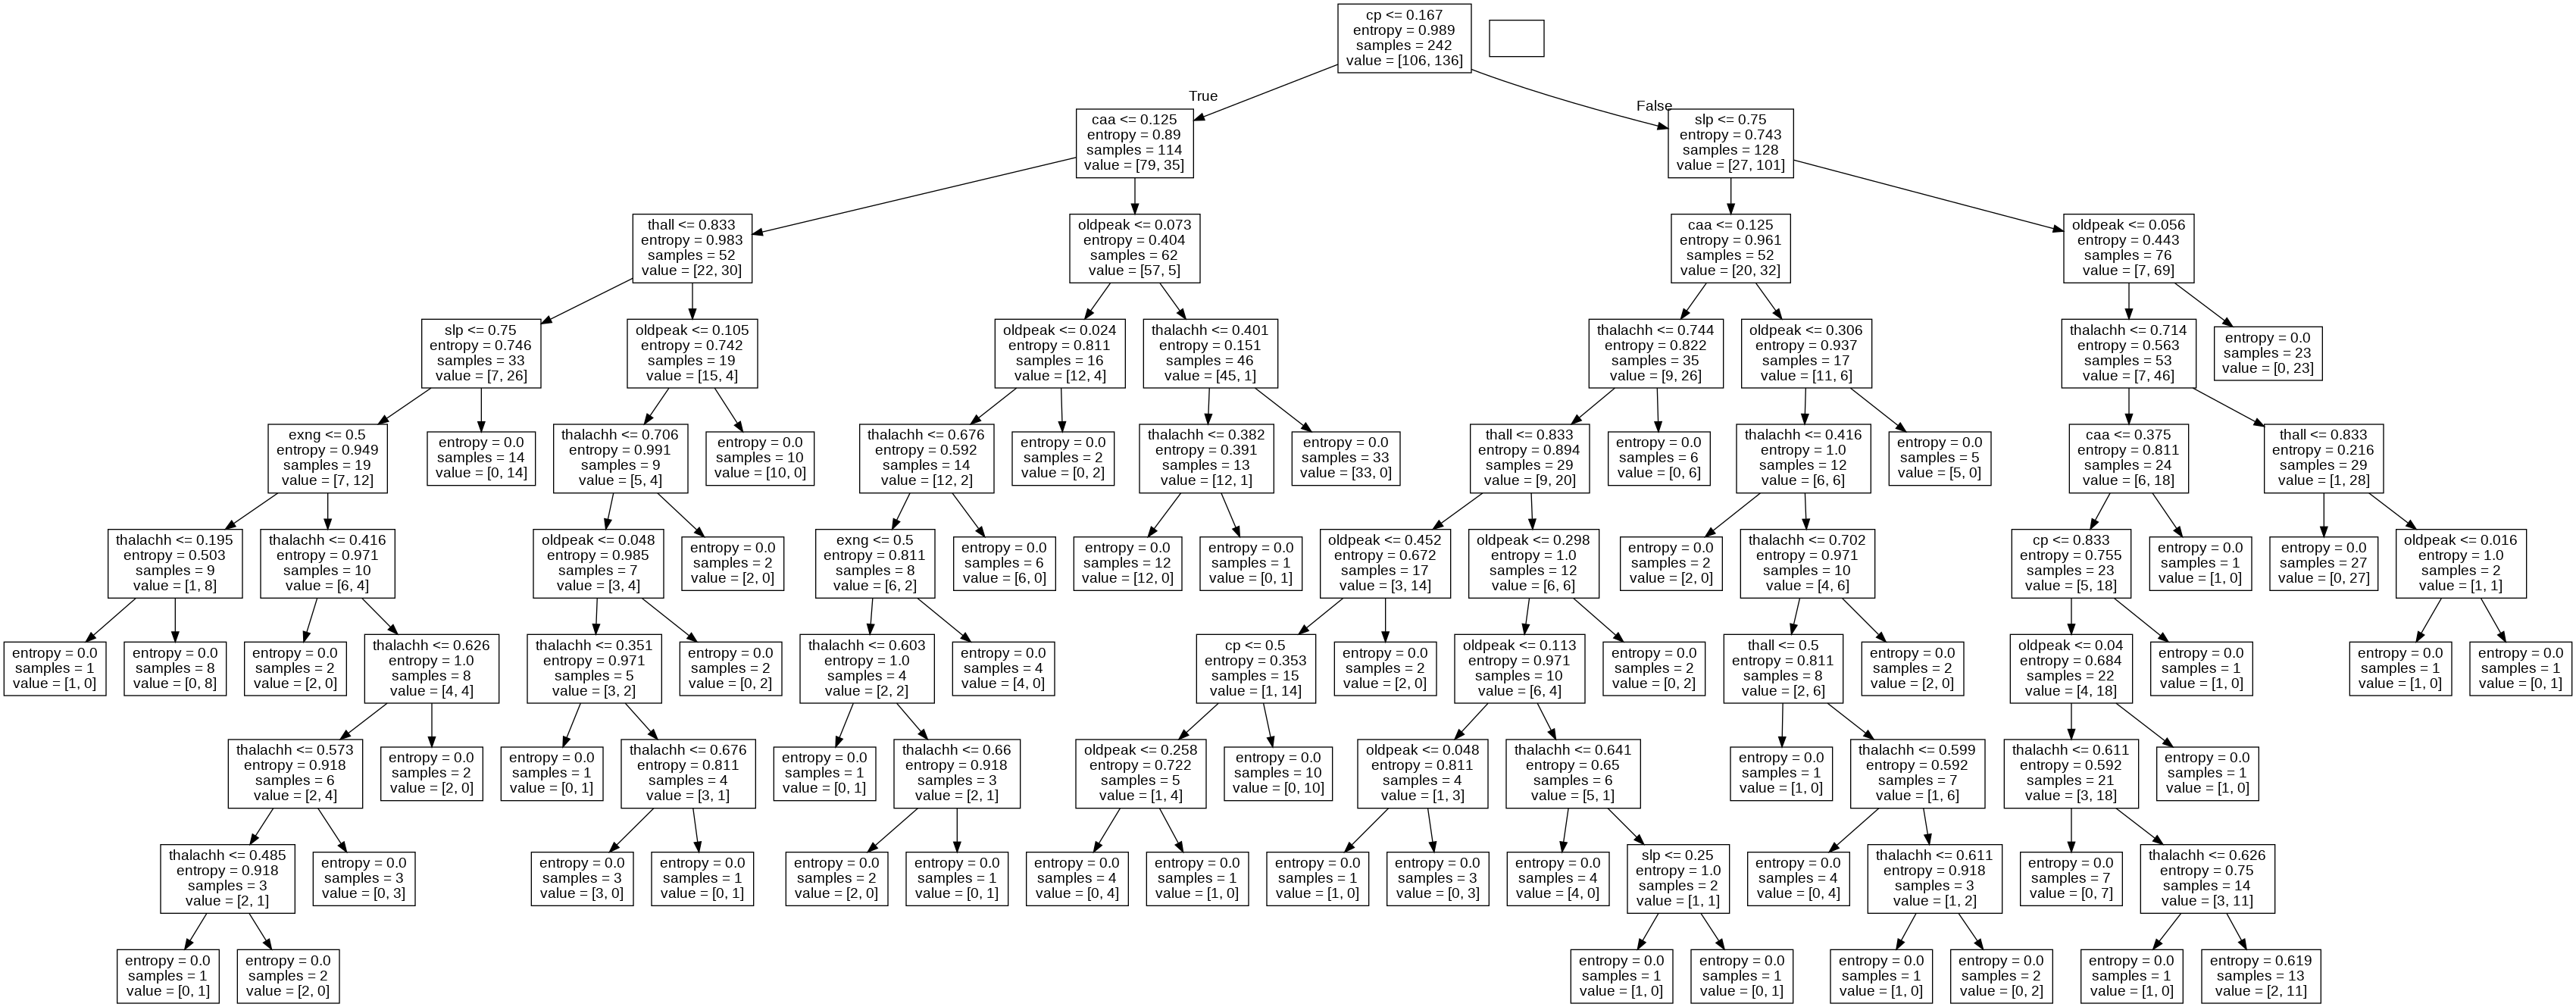

In [ ]:
#membuat pohon keputusan klasifikasi Decision Tree pada dataset dengan 8 atribut
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image

model = DecisionTreeClassifier(max_depth=9, criterion='entropy')
model.fit(xTrain3,yTrain3)

import pydotplus
feature_names=['cp','thalachh','exng','oldpeak','slp','caa','thall']
dot_data = tree.export_graphviz(model, out_file=None, feature_names=feature_names)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# visualisasi Perbandingan akurasi

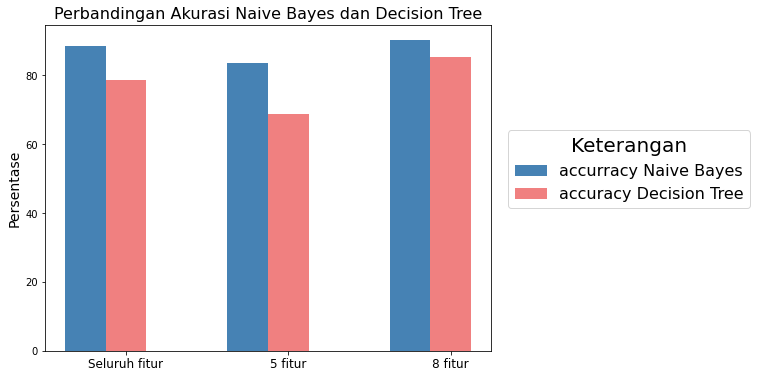

In [ ]:
#melakukan plotting pada hasil akurasi tiap metode
#hasil akurasi tiap metode ditampilkan dengan grafik batang

xfitur = ['Seluruh fitur', '5 fitur', '8 fitur']
akurasinbvis = [accuracynb1, accuracynb2, accuracynb3]
akurasidtvis = [accuracydt1, accuracydt2, accuracydt3]

x = np.arange(len(xfitur))
width = 0.25

fig, ax = plt.subplots(figsize = (8,6))

akurasinbket = ax.bar(x - width, akurasinbvis, width, label='accurracy Naive Bayes', color='steelblue')
akurasidtket = ax.bar(x, akurasidtvis, width, label='accuracy Decision Tree', color='lightcoral')


ax.set_title('Perbandingan Akurasi Naive Bayes dan Decision Tree', size=16)
ax.set_ylabel('Persentase', size=14)
ax.set_xticks(x)
ax.set_xticklabels(xfitur, size=12)

ax.legend(title = "Keterangan",
         fontsize = 16,
         title_fontsize = 20,
         bbox_to_anchor = (1.02, 0.7))
plt.show()